In [3]:
import torch
x = torch.linspace(0, 1, 100)
y = torch.sin(x*2*torch.pi) + torch.randn(100)*0.01

Text(0.5, 1.0, 'A sine wave with noise')

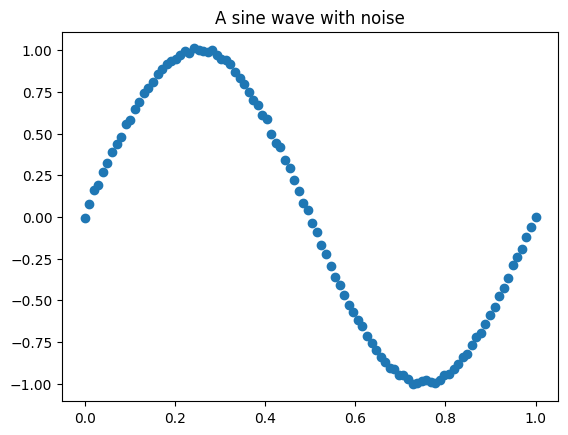

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.title("A sine wave with noise")

In [15]:
from torch import nn
from torchsummary import summary

# sequential layer
model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
)

display(model)

summary(model, (1,), device='cpu')

Sequential(
  (0): Linear(in_features=1, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=1, bias=True)
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             128
              ReLU-2                   [-1, 64]               0
            Linear-3                    [-1, 1]              65
Total params: 193
Trainable params: 193
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Text(0.5, 1.0, 'Input data compared to model output')

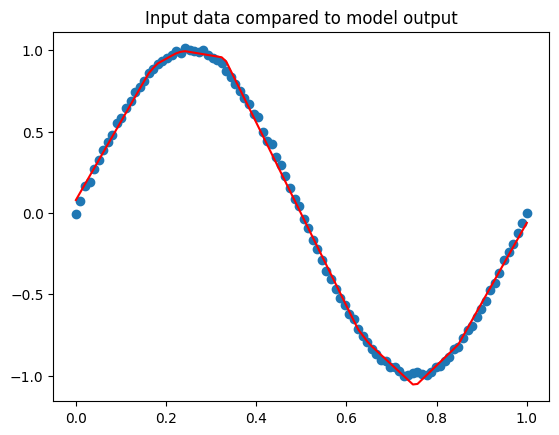

In [18]:
plt.scatter(x, y)
plt.plot(x, model(x.unsqueeze(1)).detach().numpy(), c='r')
plt.title("Input data compared to model output")

100%|██████████| 3000/3000 [00:08<00:00, 350.46it/s]


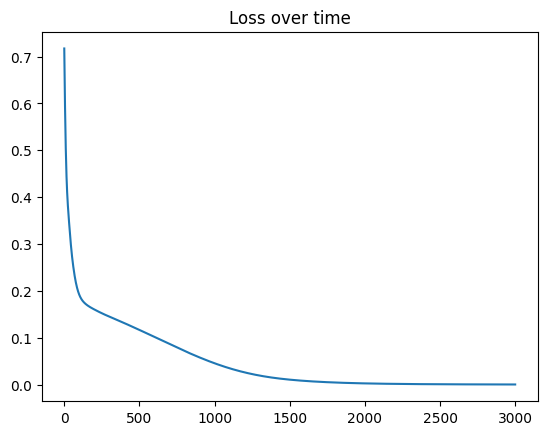

In [17]:
from torch import optim
from tqdm import tqdm

loss_fn = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-3) # 0.001

epochs = 3000

losses = []

for i in tqdm(range(epochs)):
    optimizer.zero_grad()

    y_hat = model(x.unsqueeze(1))
    loss = loss_fn(y_hat, y.unsqueeze(1))
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

plt.title("Loss over time")
plt.plot(losses)